In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
shelters = pd.read_csv('./datasets/working_data/austin_clean_breed_stats.csv')

# Info

In [3]:
shelters.head(2)

,id,name,date_in,location,intake_type,condition,age_in,breed,color,date_out,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,A047759,Oreo,2014-04-02 15:55:00,Austin (TX),surrender,normal,10.0,dachshund,Tricolor,2014-04-07 15:12:00,...,dachshund,1.0,0.50,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4 days 23:17:00
1,A134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),public_assist,injured,16.0,shetland sheepdog,Brown/White,2013-11-16 11:54:00,...,shetland sheepdog,1.0,0.95,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0 days 02:52:00


In [4]:
shelters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52797 entries, 0 to 52796
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  52797 non-null  object 
 1   name                52797 non-null  object 
 2   date_in             52797 non-null  object 
 3   location            52797 non-null  object 
 4   intake_type         52797 non-null  object 
 5   condition           52797 non-null  object 
 6   age_in              52797 non-null  float64
 7   breed               52797 non-null  object 
 8   color               52797 non-null  object 
 9   date_out            52797 non-null  object 
 10  dob                 52797 non-null  object 
 11  outcome             52797 non-null  object 
 12  age_out             52797 non-null  float64
 13  sex                 52797 non-null  int64  
 14  intact_in           52797 non-null  int64  
 15  intact_out          52797 non-null  int64  
 16  age 

In [5]:
shelters.describe()

,age_in,age_out,sex,intact_in,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
count,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000
mean,2.506885,2.539159,0.528875,0.740686,0.273822,0.844196,0.635147,21.319940,35.887588,15.980357,18.876400,38.359969,51.018792
std,3.164705,3.181923,0.499170,0.438262,0.445923,0.362673,0.260476,19.521484,29.671008,6.119850,6.499140,25.562455,32.417123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.000000,4.000000,6.000000,8.000000,2.000000,5.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,1.000000,4.000000,10.000000,13.000000,16.000000,20.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.700000,16.000000,25.000000,17.000000,19.954248,40.000000,50.000000
75%,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.950000,33.500000,52.500000,21.000000,24.000000,55.000000,80.000000
max,24.000000,24.000000,1.000000,1.000000,1.000000,1.000000,0.950000,81.000000,100.000000,48.000000,66.000000,175.000000,190.000000


# Small Changes

In [6]:
shelters['time_in_shelter'] = pd.to_timedelta(shelters['time_in_shelter'])
shelters['time_in_shelter'] = shelters['time_in_shelter'].dt.days

# Exploring the Data

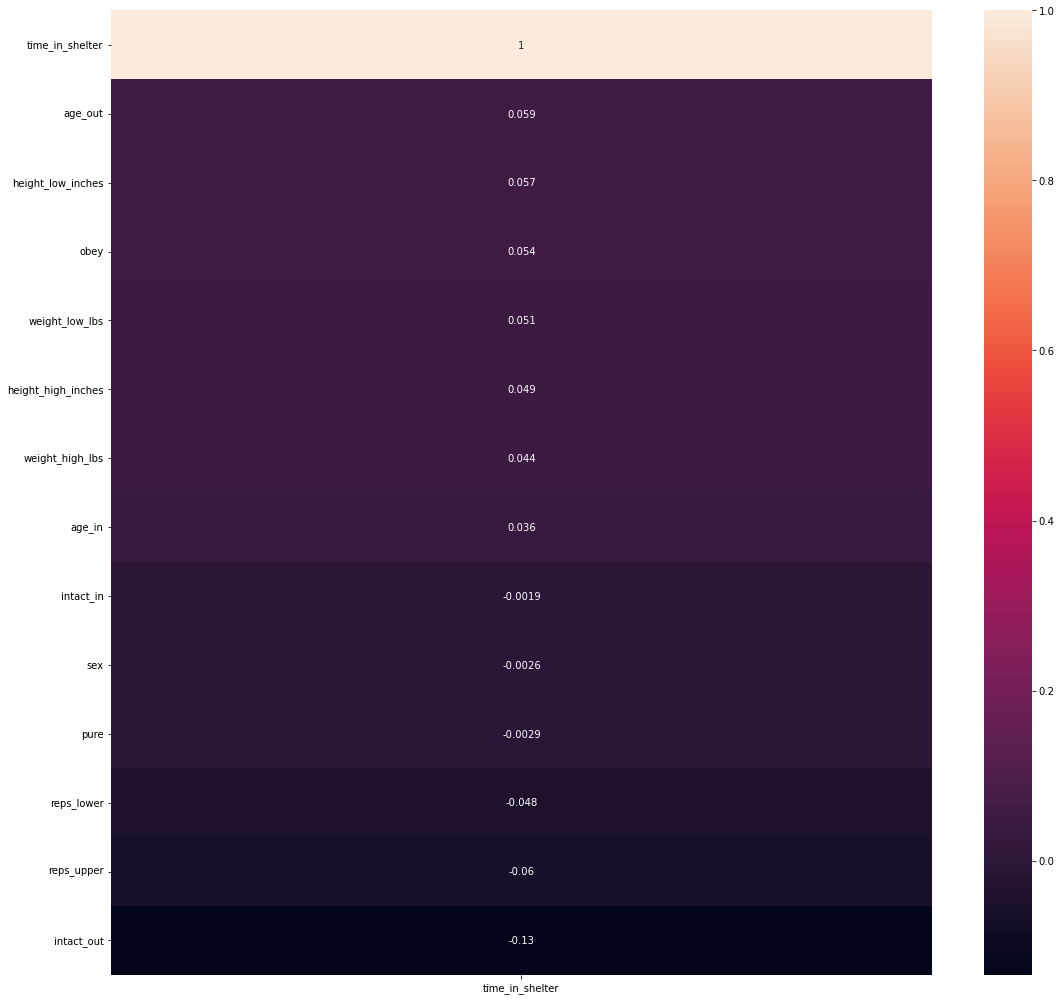

In [7]:
plt.figure(figsize=(16,14))
sns.heatmap(
    shelters.corr()[['time_in_shelter']].sort_values(by='time_in_shelter', ascending=False),
    annot=True,
)

plt.tight_layout();

In [9]:
shelters['location'].value_counts().head(20)

Austin (TX)                              8934
Travis (TX)                              1188
Outside Jurisdiction                      406
7201 Levander Loop in Austin (TX)         381
Manor (TX)                                322
Del Valle (TX)                            259
Pflugerville (TX)                         235
4434 Frontier Trail in Austin (TX)        116
4434 Frontier Trl in Austin (TX)           97
124 West Anderson Lane in Austin (TX)      72
124 W Anderson Ln in Austin (TX)           69
12034 Research Blvd in Austin (TX)         61
Leander (TX)                               60
1156 W Cesar Chavez in Austin (TX)         56
12034 Research in Austin (TX)              44
4434 Frontier in Austin (TX)               40
Lago Vista (TX)                            33
5701 Johnny Morris Rd in Austin (TX)       30
1430 Frontier Valley in Austin (TX)        29
1156 W Cesar Chavez St in Austin (TX)      29
Name: location, dtype: int64

# Breeds

### Breed 1

In [8]:
breed_1 = shelters['breed_1'].value_counts().head(20)                               # top 20 breeds for breed_1
breed_1 = pd.DataFrame(breed_1).reset_index()                                       # create data frame and reset index
breed_1.rename(columns={'index': 'breed_1', 'breed_1': 'count'}, inplace=True)      # rename columns
breed_1.head()

,breed_1,count
0,labrador retriever,7753
1,pit bull,7752
2,chihuahua,7715
3,german shepherd,3680
4,australian cattle dog,2291


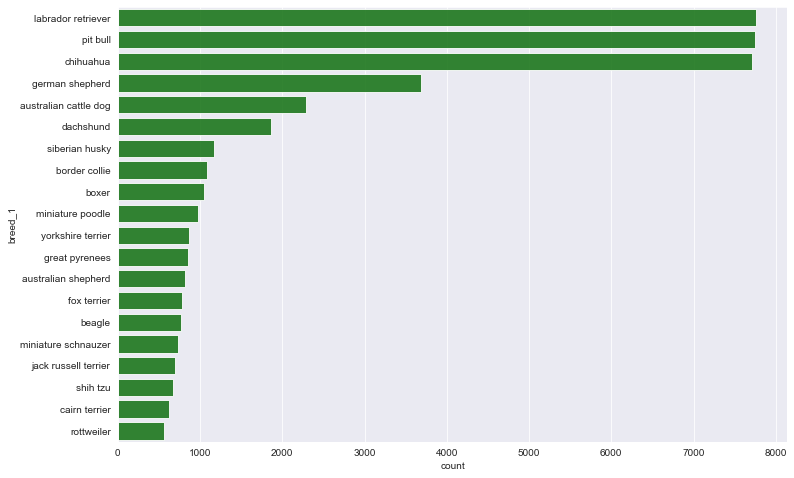

In [9]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')

sns.barplot(
    data=breed_1, 
    orient='h', 
    x='count', 
    y='breed_1',
    ci=None,
    color='green',
    alpha=.85
);

### Breed 2

In [10]:
breed_2 = shelters['breed_2'].value_counts().head(20)                               # top 20 breeds for breed_2
breed_2 = pd.DataFrame(breed_2).reset_index()                                       # create data frame and reset index
breed_2.rename(columns={'index': 'breed_2', 'breed_2': 'count'}, inplace=True)      # rename columns
breed_2.head()

,breed_2,count
0,pit bull,7913
1,chihuahua,7658
2,labrador retriever,7473
3,german shepherd,3641
4,australian cattle dog,2371


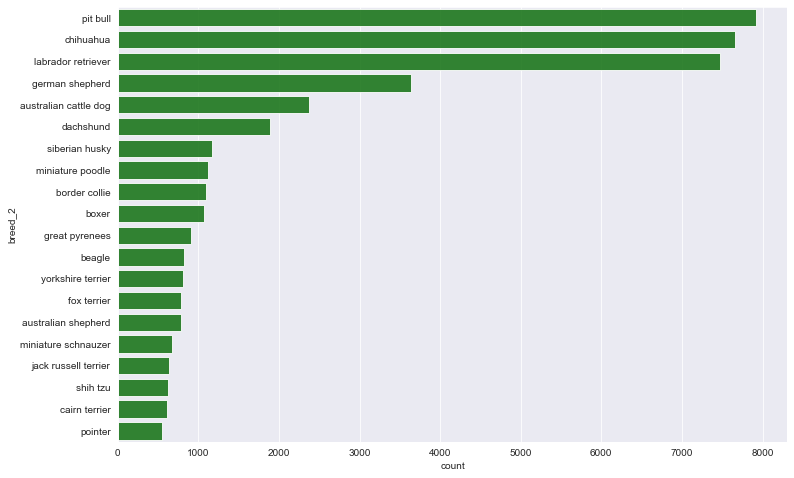

In [11]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')

sns.barplot(
    data=breed_2, 
    orient='h', 
    x='count', 
    y='breed_2',
    ci=None,
    color='green',
    alpha=.85
);

In [12]:
# breed_1 groupby
# looking at time_in_shelter and amount of dogs per breed
breed_gby = shelters.groupby(['breed_1']).agg(['mean','size'])
breed_gby = breed_gby.sort_values(by=('time_in_shelter','size'), ascending=False)
breed_gby.head(20)

age_in         age_out             sex        \
                           mean  size      mean  size      mean  size   
breed_1                                                                 
labrador retriever     2.010835  7753  2.045273  7753  0.517348  7753   
pit bull               2.211042  7752  2.253999  7752  0.524897  7752   
chihuahua              2.852106  7715  2.880363  7715  0.521581  7715   
german shepherd        1.951630  3680  1.979348  3680  0.520380  3680   
australian cattle dog  2.011349  2291  2.041467  2291  0.462244  2291   
dachshund              2.798925  1860  2.831183  1860  0.551075  1860   
siberian husky         2.034953  1173  2.054561  1173  0.523444  1173   
border collie          2.245630  1087  2.276909  1087  0.459062  1087   
boxer                  2.577181  1043  2.622244  1043  0.495686  1043   
miniature poodle       3.985597   972  4.012346   972  0.576132   972   
yorkshire terrier      3.245064   861  3.274100   861  0.531940   861   
great pyrenees         1.573443   851  1.594595   851  0.578143   851   
australian shepherd    2.355231   822  2.378345   822  0.495134   822   
fox terrier            3.346598   779  3.376123   779  0.532734   779   
beagle                 2.975293   769  3.002601   769  0.509753   769   
miniature schnauzer    3.443526   726  3.487603   726  0.568871   726   
jack russell terrier   2.432277   694  2.456772   694  0.569164   694   
shih tzu               4.097451   667  4.124438   667  0.553223   667   
cairn terrier          2.027113   627  2.052632   627  0.535885   627   
rottweiler             2.719081   566  2.759717   566  0.586572   566   

                      intact_in       intact_out        ... height_low_inches  \
                           mean  size       mean  size  ...              mean   
breed_1                                                 ...                     
labrador retriever     0.740359  7753   0.248291  7753  ...         20.869504   
pit bull               0.780960  7752   0.333720  7752  ...         17.070616   
chihuahua              0.770577  7715   0.268827  7715  ...          6.273766   
german shepherd        0.776902  3680   0.277989  3680  ...         21.883384   
australian cattle dog  0.747272  2291   0.212134  2291  ...         17.157926   
dachshund              0.726344  1860   0.208602  1860  ...          7.383966   
siberian husky         0.768968  1173   0.335891  1173  ...         20.028108   
border collie          0.700092  1087   0.200552  1087  ...         19.151145   
boxer                  0.693193  1043   0.280920  1043  ...         20.784727   
miniature poodle       0.670782   972   0.260288   972  ...         10.215626   
yorkshire terrier      0.725900   861   0.341463   861  ...          8.241682   
great pyrenees         0.850764   851   0.388954   851  ...         26.461222   
australian shepherd    0.699513   822   0.243309   822  ...         18.119687   
fox terrier            0.695764   779   0.228498   779  ...         12.705731   
beagle                 0.664499   769   0.231469   769  ...         13.197965   
miniature schnauzer    0.685950   726   0.241047   726  ...         17.140496   
jack russell terrier   0.714697   694   0.194524   694  ...         17.090948   
shih tzu               0.664168   667   0.508246   667  ...          8.154224   
cairn terrier          0.791069   627   0.237640   627  ...          8.981682   
rottweiler             0.738516   566   0.330389   566  ...         21.837456   

                            height_high_inches       weight_low_lbs        \
                       size               mean  size           mean  size   
breed_1                                                                     
labrador retriever     7753          23.884320  7753      54.751159  7753   
pit bull               7752          19.101053  7752      40.372859  7752   
chihuahua              7715           9.243922  7715       3.002204  7715   
german shepherd    

# Intake Type

In [13]:
shelters['intake_type'].value_counts()

stray            39009
surrender         9108
public_assist     4270
abandoned          246
euth_request       164
Name: intake_type, dtype: int64

In [14]:
intake_gby = shelters.groupby(by='intake_type').mean()
intake_gby.sort_values(by='time_in_shelter')

,age_in,age_out,sex,intact_in,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
intake_type,,,,,,,,,,,,,,
euth_request,8.286585,8.286585,0.567073,0.426829,0.402439,0.859756,0.687796,18.242021,30.306608,16.786765,19.809561,42.255958,54.903555,3.274390
public_assist,3.526230,3.555269,0.582904,0.558314,0.345902,0.863232,0.633129,21.532672,35.723648,15.975654,18.758883,38.583553,50.557337,14.008899
abandoned,1.284553,1.321138,0.491870,0.882114,0.345528,0.796748,0.676520,17.822738,30.880946,17.434601,20.380427,43.202628,57.326133,15.308943
stray,2.329539,2.362250,0.530903,0.788613,0.273322,0.852265,0.636747,21.189637,35.737690,16.036212,18.948510,38.491660,51.213817,15.628752
surrender,2.717501,2.749890,0.495169,0.622749,0.237923,0.801713,0.627176,21.928161,36.842166,15.689541,18.565229,37.490178,50.159548,20.538318


# Condition

In [15]:
shelters['condition'].value_counts()

normal      46537
injured      2794
sick         1665
nursing      1154
aged          326
other         105
medical        89
pregnant       63
neonatal       44
behavior       20
Name: condition, dtype: int64

In [16]:
condition_gby = shelters.groupby(by='condition').mean()
condition_gby.sort_values(by='time_in_shelter')

,age_in,age_out,sex,intact_in,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
condition,,,,,,,,,,,,,,
sick,2.634234,2.667267,0.512913,0.839039,0.631231,0.893694,0.619874,22.048195,37.746453,15.524660,18.360315,37.057196,48.761948,13.396396
aged,11.972393,12.009202,0.542945,0.319018,0.266871,0.904908,0.603291,24.031556,40.372471,14.897329,17.849663,33.739023,45.342415,15.141104
normal,2.446054,2.477921,0.527967,0.731912,0.242022,0.840321,0.634968,21.361978,35.884470,16.012079,18.912803,38.475783,51.204683,15.596149
neonatal,0.045455,0.045455,0.500000,1.000000,0.772727,0.772727,0.659091,18.250000,32.545455,15.625000,18.238636,34.465909,46.625000,15.636364
medical,2.955056,3.011236,0.561798,0.865169,0.426966,0.820225,0.621567,22.973225,37.787632,16.902512,19.642983,41.862965,55.551333,19.483146
injured,3.261632,3.312097,0.555476,0.762706,0.431639,0.881890,0.620079,22.110956,37.607783,15.505263,18.372460,36.580850,48.552554,24.414460
nursing,0.214038,0.216638,0.538995,0.988735,0.597054,0.822357,0.711564,15.762795,27.797344,16.818075,19.716861,41.542373,54.854255,26.648180
pregnant,2.015873,2.015873,0.190476,0.968254,0.634921,0.809524,0.591585,23.886018,38.905212,15.398693,18.038178,34.310717,45.823789,30.396825
other,4.219048,4.257143,0.495238,0.704762,0.380952,0.895238,0.637469,21.531003,36.001486,15.257703,17.888702,35.447712,46.680205,34.647619


# Time in Shelter

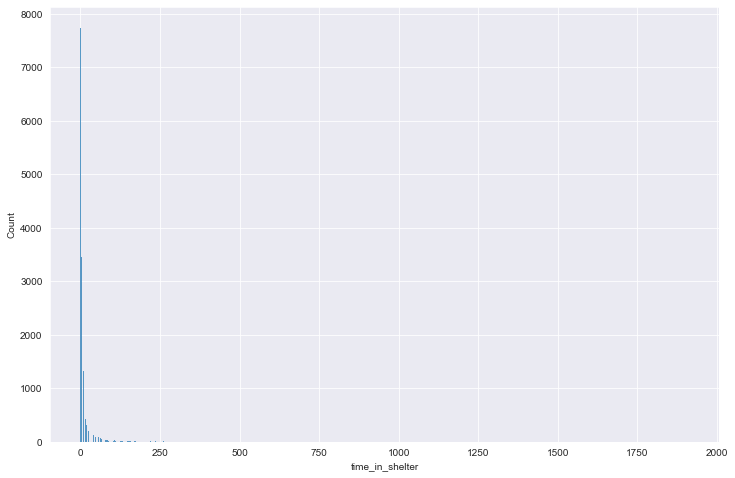

In [17]:
plt.figure(figsize=(12,8))
sns.histplot(shelters['time_in_shelter']);

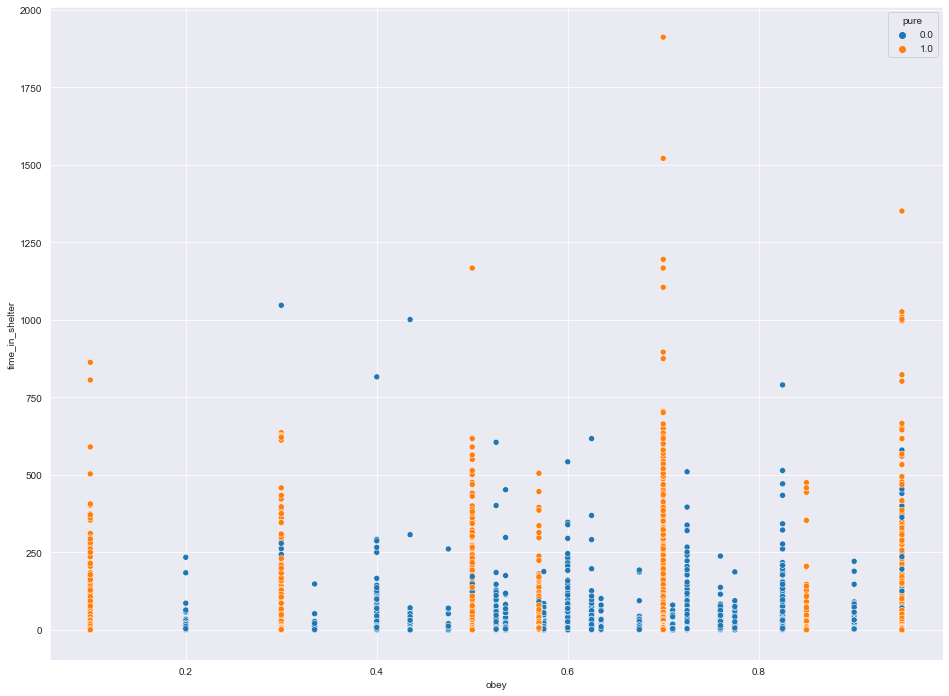

In [18]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shelters, x='obey', y='time_in_shelter', hue='pure');

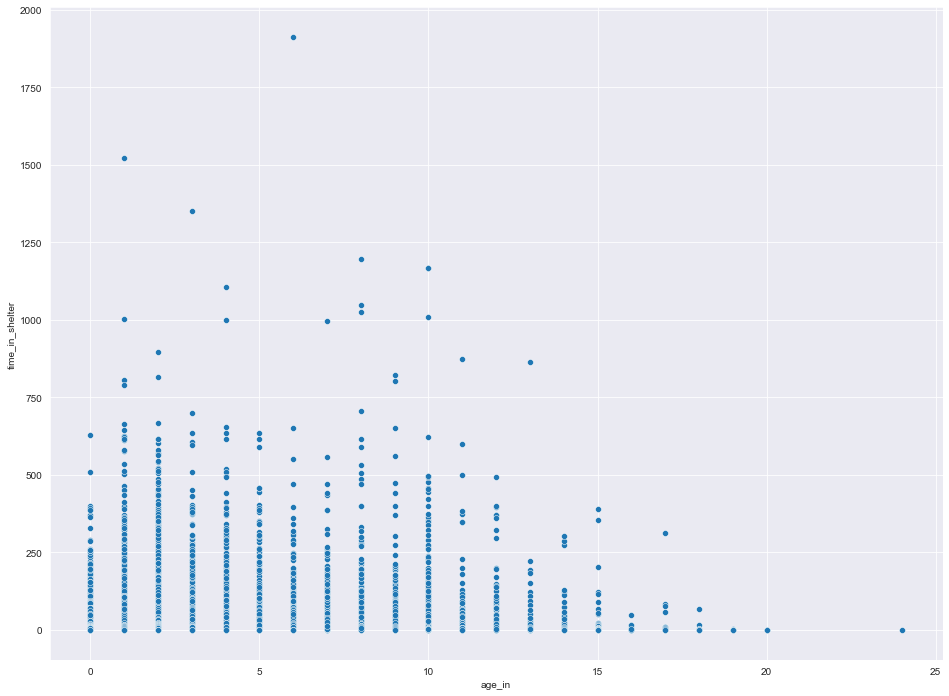

In [19]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shelters, x='age_in', y='time_in_shelter');

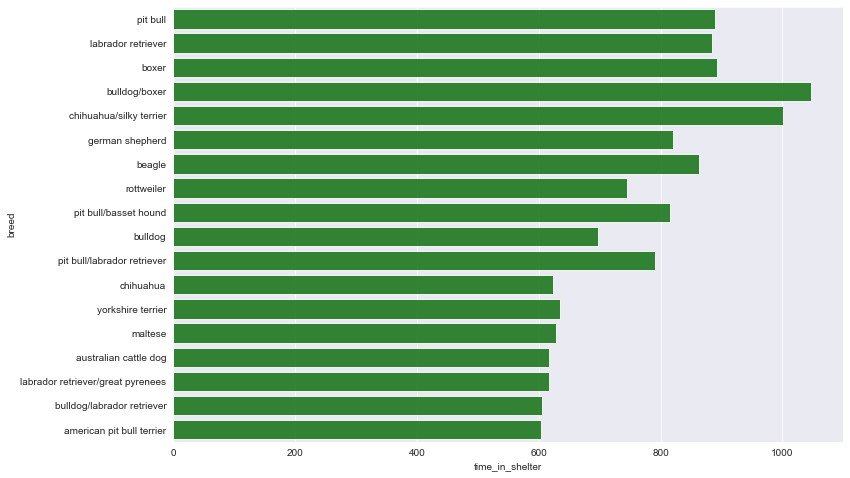

In [20]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')

sns.barplot(
    data=shelters.sort_values(by='time_in_shelter', ascending=False).head(50), 
    orient='h', 
    x='time_in_shelter', 
    y='breed',
    ci=None,
    color='green',
    alpha=.85
);

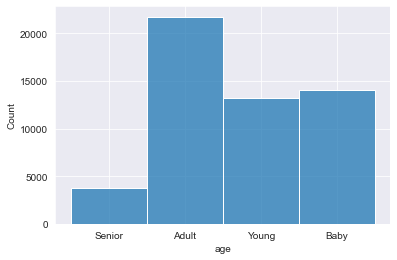

In [21]:
sns.histplot(shelters['age']);

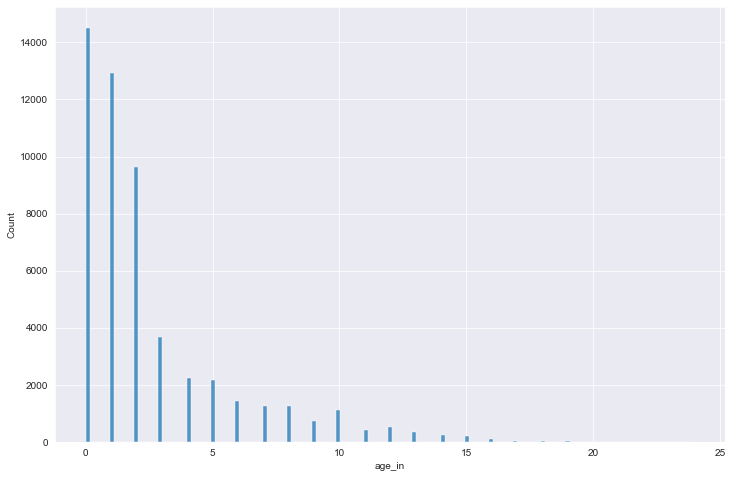

In [22]:
plt.figure(figsize=(12,8))
sns.histplot(shelters['age_in']);

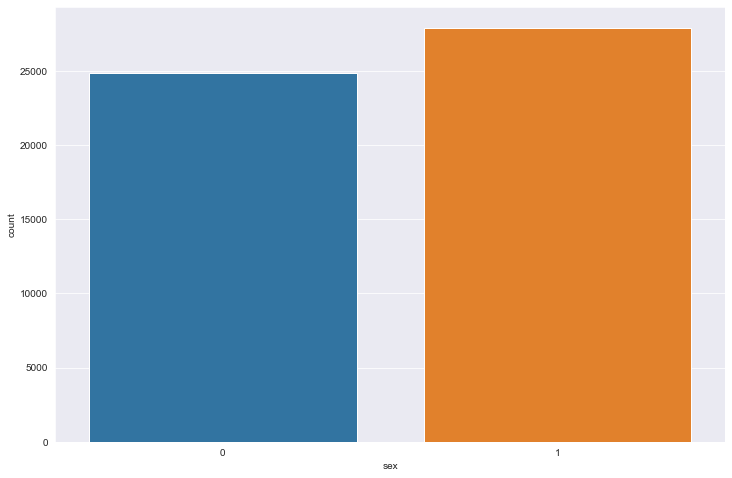

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(data=shelters, x='sex');

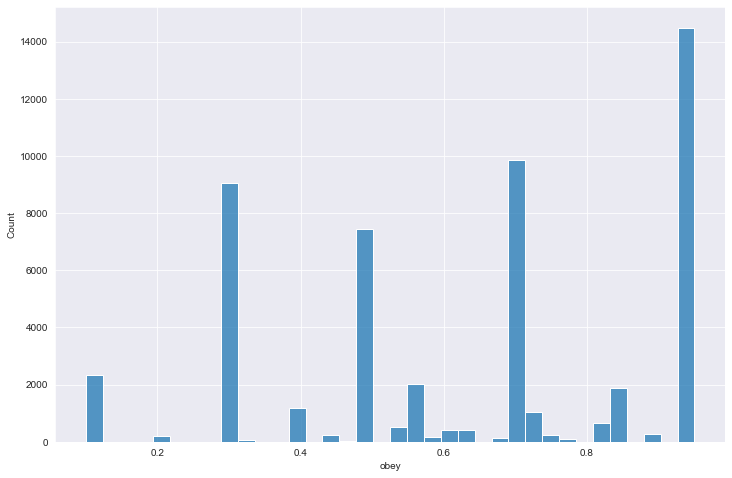

In [24]:
plt.figure(figsize=(12,8))
sns.histplot(shelters['obey']);